# Звіт про дослідження роботи алгоритмів Прима та Крускала

### Виконала: Іванченко Марія

**Мета дослідження:** порівняти та дослідити роботу двох алгоритмів, які виконують однакове завдання - побудова
мінімального каркасу.

**Критерії порівняння:** змінюючи кількість вершин та заповненість графу знати мінімальний час виконання.

**Процес дослідження:** спочатку було необхідно навчитись виконувати алгоритм на папері. Згодом реалізувати його у програму, яка працювала б швидко та правильно. Останнім етапом було порівняти алгоритми. Для цього я використовувала функцію генерації графа та обчислення часу з прикріпленого файлу.

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from networkx.algorithms import tree

def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

In [3]:
G = gnp_random_connected_graph(5, 0.5, False)
prim = tree.minimum_spanning_tree(G, algorithm="prim")
kruskal = tree.minimum_spanning_tree(G, algorithm="kruskal")

## Алгоритм Прима

Спершу, з переданого у функцію графа, я отримую список вершин та ребер. Ребра я одразу сортую за вагою. Створюю множину з відвіданими вершинами і додаю 0(вибрана вершина). Для кожного ребра перевіряю умови. Перша, перевіряє інцидентність ребра, друга наявність циклу. Мінімальну вагу обраного ребра забезпечує раніше зроблене сортування. Повторюємо (вершини - 1) разів.

In [4]:
def prim_algo(graph) -> list:
    """
    Function finds the shortest path using Prim`s algorythm.
    >>> prim_algo(G) == prim(G)
    True
    """
    verteces = len(graph.nodes())
    edges = sorted([((val[0], val[1]),val[2]["weight"]) for val in list(graph.edges(data=True))], key = lambda x: x[1])
    visited = {0}
    frame = []
    for _ in range(verteces-1):
        for edg in edges:
            if edg[0][0] in visited or edg[0][1] in visited:
                if (edg[0][0] in visited and edg[0][1] not in visited) or (edg[0][1] in visited and edg[0][0] not in visited):
                    frame.append(edg[0])
                    visited.update(list(edg[0]))
                    edges.remove(edg)
                    break
    return frame

## Алгоритм Крускала
Спочатку процедура аналогічна. Утворюємо список з вершинами, з сортованими ребрами та множину відвіданих цього разу порожню. Потім, перше ребро зі списку додаємо до каркасу, бо воно найменше та вершини записуємо як відвідані. Проходимось по ребрах, перевіряючи на наявність циклу. Повторюємо доти поки множина відвіданих не буде заповнена.

In [5]:
def kruskal_try(graph):
    """
    Function finds the shortest path using Kruskal`s algorythm.
    >>> kruskal_algo(G) == kruskal(G)
    True
    """
    verteces = list(graph.nodes())
    edges = sorted([((val[0], val[1]),val[2]["weight"]) for val in list(graph.edges(data=True))], key = lambda x: x[1])
    visited = set()
    visited.update(list(edges[0][0]))
    frame = []
    frame.append(edges.pop(0)[0])
    while len(visited) != len(verteces):
        for elem in edges:
            if (elem[0][0] in visited and elem[0][1] not in visited) or (elem[0][1] in visited and elem[0][0] not in visited):
                frame.append(elem[0])
                visited.update(list(elem[0]))
                edges.remove(elem)
                break
    return frame

## Код для підрахунку часу

In [37]:
import time
from tqdm import tqdm

completness = [0.3, 0.5, 0.9]
num_of_nodes = [20,50,100]
time_p = []
time_k = []
for i in completness:
    p = []
    k = []
    for j in num_of_nodes:
        G1 = gnp_random_connected_graph(j,i,False)
        NUM_OF_ITERATIONS = 1000
        time_taken = 0
        time_taken1 = 0
        for _ in tqdm(range(NUM_OF_ITERATIONS)):

            start = time.time()
            prim_algo(G1)
            end = time.time()
            time_taken += end - start
            
            start1 = time.time()
            kruskal_try(G1)
            end1 = time.time()
            time_taken1 += end1 - start1
        p.append(time_taken / NUM_OF_ITERATIONS)
        k.append(time_taken1 / NUM_OF_ITERATIONS)
    time_p.append(p)
    time_k.append(k)

100%|██████████| 1000/1000 [00:30<00:00, 32.40it/s]


## Графік

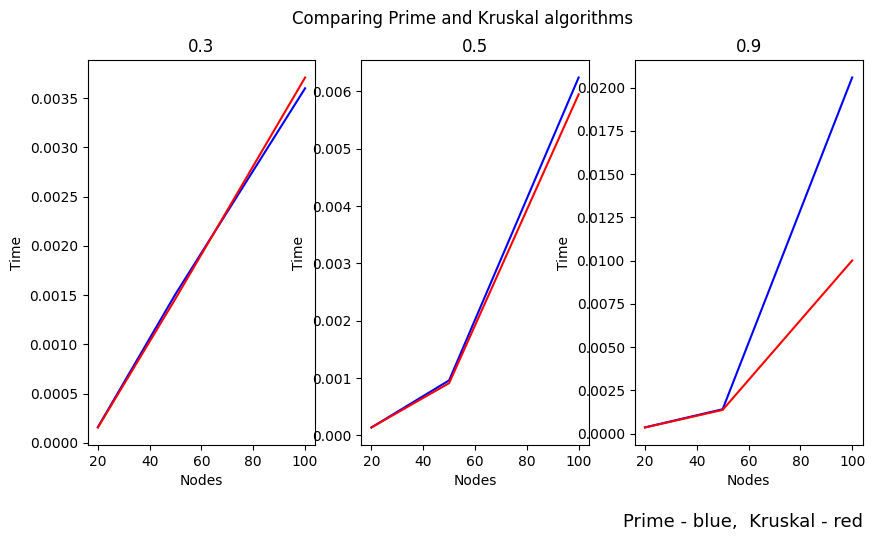

In [38]:
import matplotlib.pyplot as plt
import numpy as np

time = time_p
time1 = time_k
nodes = [20, 50, 100]
completness = [0.3, 0.5, 0.9]

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
plt.suptitle("Comparing Prime and Kruskal algorithms")
for i in range(3):
    axs[i].plot(nodes, time[i], color="blue")
    axs[i].plot(nodes, time1[i], color="red")
    axs[i].set_title(completness[i])
    axs[i].set_xlabel("Nodes")
    axs[i].set_ylabel("Time")
plt.annotate(
    "Prime - blue,  Kruskal - red",
    xy=(1.0, -0.2),
    xycoords="axes fraction",
    ha="right",
    va="center",
    fontsize=13,
)
plt.show()


## Підсумок

У результаті дослідження було виявлено, що алгоритм Прима працює швидше, хоча його принцип не такий елементарний як у Краскала. Я думаю це спричинено тим, що Краскала перебирає усі ребра, обираючи найменше з можливих. Прима знаходить перше найменше ребро.
- Прима краще працює з графами, де параметр заповненості графу більший, а Краскала, коли менший.
- Прим може включити у каркас різні ребра, якщо вони однакової ваги. Це не вплине на загальну сумарну вагу графу, але використані ребра будуть відрізнятись. Крускал ж завжди має єдиний розвʼязок.